In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity


Reading a demo user data where user_id represents the users and the s1 s2 ... s6 represents differents songs.

lets us now load the data into data frame

In [83]:
df=pd.read_csv('Book1.csv')

using head() we can see the top values of the data

In [84]:
df.head()

,user_id,s1,s2,s3,s4,s5,s6
0,1,4,5,0,1,2,4
1,2,1,5,4,0,2,4
2,3,4,1,3,2,4,0
3,4,4,0,1,2,5,3
4,5,1,5,5,5,0,3


the below plot shows values of rating of songs of differents users

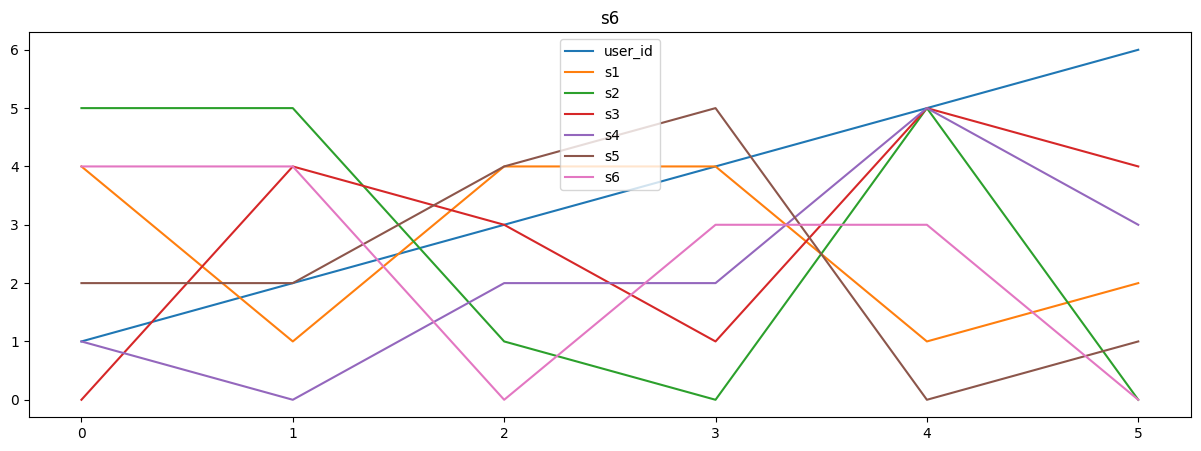

In [85]:
def plot():
  for i in df:
     df[i].plot(kind='line', figsize=(15,5), title=i ,legend = i)
plot()


here the values 0 represents that the user has not rated but if we use 0 while matrix factorization and multiplication techniques it results 0 overall so we remove it using the mean value rating of all the songs of the user

In [86]:
def avg(row):
  new = (row-row.mean())/(row.max()-row.min())
  return new
new_df=df.apply(avg)
new_df.head()

,user_id,s1,s2,s3,s4,s5,s6
0,-0.5,0.444444,0.466667,-0.566667,-0.233333,-0.066667,0.416667
1,-0.3,-0.555556,0.466667,0.233333,-0.433333,-0.066667,0.416667
2,-0.1,0.444444,-0.333333,0.033333,-0.033333,0.333333,-0.583333
3,0.1,0.444444,-0.533333,-0.366667,-0.033333,0.533333,0.166667
4,0.3,-0.555556,0.466667,0.433333,0.566667,-0.466667,0.166667


here we that standardized all values with respect to each other and now we can apply the models


In [87]:
similarity=cosine_similarity(new_df.T)
print(similarity)
final_df=pd.DataFrame(similarity , index=df.columns , columns = df.columns)
final_df

[[ 1.         -0.3550358  -0.53825114  0.57837123  0.77583901 -0.28708463
  -0.57416925]
 [-0.3550358   1.         -0.44589632 -0.8441858  -0.28279597  0.76104239
  -0.16647802]
 [-0.53825114 -0.44589632  1.          0.10643042 -0.11992507 -0.5547002
   0.73497776]
 [ 0.57837123 -0.8441858   0.10643042  1.          0.48860944 -0.59036973
  -0.31363392]
 [ 0.77583901 -0.28279597 -0.11992507  0.48860944  1.         -0.45734191
  -0.3326123 ]
 [-0.28708463  0.76104239 -0.5547002  -0.59036973 -0.45734191  1.
  -0.09615385]
 [-0.57416925 -0.16647802  0.73497776 -0.31363392 -0.3326123  -0.09615385
   1.        ]]


,user_id,s1,s2,s3,s4,s5,s6
user_id,1.000000,-0.355036,-0.538251,0.578371,0.775839,-0.287085,-0.574169
s1,-0.355036,1.000000,-0.445896,-0.844186,-0.282796,0.761042,-0.166478
s2,-0.538251,-0.445896,1.000000,0.106430,-0.119925,-0.554700,0.734978
s3,0.578371,-0.844186,0.106430,1.000000,0.488609,-0.590370,-0.313634
s4,0.775839,-0.282796,-0.119925,0.488609,1.000000,-0.457342,-0.332612
s5,-0.287085,0.761042,-0.554700,-0.590370,-0.457342,1.000000,-0.096154
s6,-0.574169,-0.166478,0.734978,-0.313634,-0.332612,-0.096154,1.000000


here we got 7 rows bcz we have a song to song likelihood which represnts for each song s1 s2 ... sn and we also have a user to song rating which occupies another row so total 7


now we need to make a prediction fucntion for this to get what our predicted song for user with song s1 s2 ,..sn

In [88]:
def similar(song,rating):
  temp=final_df[song]*rating
  temp=temp.sort_values(ascending=False)
  return temp

In [111]:
lst = []
n = int(input("Enter how many songs did the user listen: "))

for i in range(n):
    temp = input("Enter the song and rating (e.g., song_name rating): ")
    lst.append(temp.split())
data = []
for i in lst:
    song_name = i[0]
    rating = int(i[1])
    result_dict = similar(song_name, rating)
    data.append(result_dict)
inp = pd.DataFrame(data)
print(inp.sum().sort_values(ascending=False))


Enter how many songs did the user listen: 3
Enter the song and rating (e.g., song_name rating): s1 3
Enter the song and rating (e.g., song_name rating): s4 5
Enter the song and rating (e.g., song_name rating): s5 5
s1         5.391232
s5         4.996418
s4         1.864903
user_id    1.378664
s6        -2.643265
s3        -3.041359
s2        -4.710815
dtype: float64


here it shows the top recommendation for the user


**we can later user pickle to pack the model and use it where ever we want**
